Introduction

As we study the OECD data on gender wage gap in different countries, we come across a variety of diverse measures. But when it comes to Costa Rica, there is a noticeable outlying tendency to it with regard to general world’s tendency throughout the observed period, as can be seen below:

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

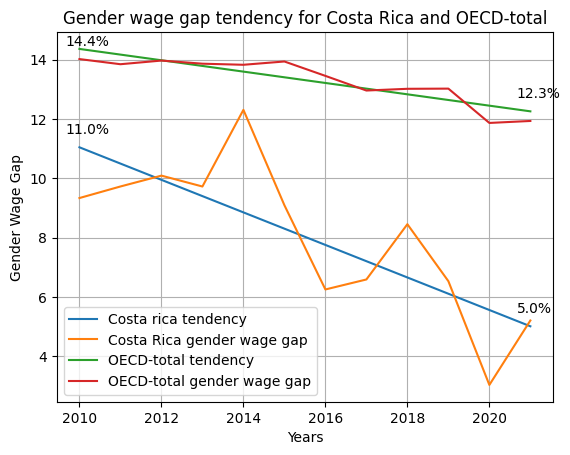

In [195]:
df = pd.read_csv('cr_data.csv', sep=";", index_col='TIME')
df['Time'] = np.arange(len(df.index))
df.head()
X = df.loc[:, ['Time']]
y_cr = df.loc[:, 'COSTA-RICA']
y_tot = df.loc[:, 'OECD']
model = linear_model.LinearRegression()
model.fit(X, y_cr)
y_cr_pred = pd.Series(model.predict(X), index=X.index)
model.fit(X, y_tot)
y_tot_pred = pd.Series(model.predict(X), index=X.index)
fig, ax = plt.subplots()
ax.plot([int(x) for x in range(2010, 2022)], y_cr_pred.tolist())
ax.plot([int(y) for y in range(2010, 2022)], y_cr.tolist())
ax.plot([int(x) for x in range(2010, 2022)], y_tot_pred.tolist())
ax.plot([int(y) for y in range(2010, 2022)], y_tot.tolist())
ax.set(xlabel='Years', ylabel='Gender Wage Gap', title='Gender wage gap tendency for Costa Rica and OECD-total')
ax.grid()
ax.annotate(f'{round(y_tot_pred.tolist()[0],1)}%', (2010, y_tot_pred.tolist()[0]), textcoords="offset points", xytext=(-10, 2), horizontalalignment='left')
ax.annotate(f'{round(y_cr_pred.tolist()[0],1)}%', (2010, y_cr_pred.tolist()[0]), textcoords="offset points", xytext=(-10, 10), horizontalalignment='left')
ax.annotate(f'{round(y_tot_pred.tolist()[-1],1)}%', (2021, y_tot_pred.tolist()[-1]), textcoords="offset points", xytext=(-10, 10), horizontalalignment='left')
ax.annotate(f'{round(y_cr_pred.tolist()[-1],1)}%', (2021, y_cr_pred.tolist()[-1]), textcoords="offset points", xytext=(-10, 10), horizontalalignment='left')
plt.legend(['Costa rica tendency','Costa Rica gender wage gap', 'OECD-total tendency', 'OECD-total gender wage gap'])
plt.show()


The OECD-total tendency shows 14.6% fall of gender wage gap over the observed period, whereas Costa Rica’s achievement is 54.5% decrease.

What is necessary to mention is that the Gender Wage Gap is calculated out of the definition given by OECD, whose data is used worldwide. Nevertheless, the expectations for the definition might not be met for everybody:
“The gender wage gap is defined as the difference between median earnings of men and women relative to median earnings of men. Data refer to full-time employees on the one hand and to self-employed on the other.”
Meaning, there is no consideration of age, tenure, qualification, employment sector, etc. whatsoever.


Overview
Thorough research of labour market data of Costa Rica, however, does not provide the base for such
phenomenon of low Gender Wage Gap. Starting with  OECD data, same source as the original dataset:

![alternative text](Picture_1.png)

As we can see, the indicator of Gender Labour Income Gap, however, shows a different picture. Costa Rica is performing 27.3% worse in the matter of yearly income per capita than the OECD-total for the year 2015. The Gender Wage Gap at that point of time is 35.7% less than the OECD-total according to the original dataset.
Gender labour income gap: Difference between per capita annual earnings of men and women (% of per capita earnings of men) - OECD


Theoretically the inconsistency described above can have place. As long as Gender wage gap indicator considers the incomes of self-employed, it is only possible if there is a significant gap in the number of self-employed men and women (only in case per capita included unemployed people) or/and there is a significant difference in the average time of work for men and women.

Using the dataset by International Labour Organization, we can see:

![alternative text](Picture_2.png)

By visualising the data, we can see a significant gap between numbers of self-employed men and women.

To discover the relation between the number of self-employed people and gender wage gap, we can have a look at the correlation of the ratio (self-employed men / self-employed women) vs. gender wage gap. As shown below:

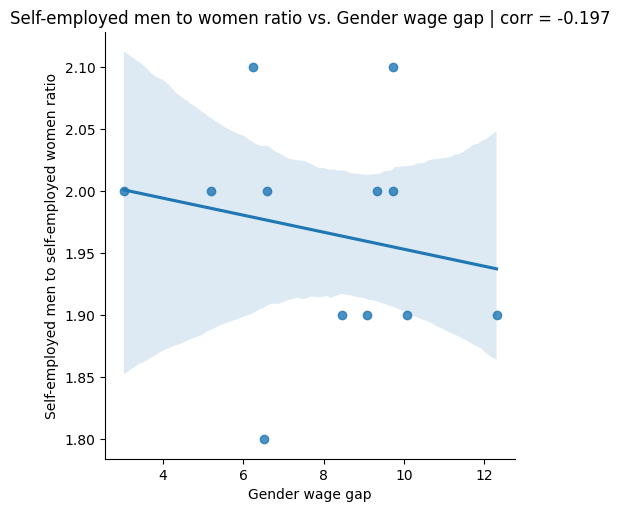

In [196]:
gwg = np.array(df.loc[:, 'COSTA-RICA'])
self_employed_ratio = np.array(df.loc[:, 'SELF-EMPL_MEN-WOMEN_RATIO'])
r = np.corrcoef(gwg, self_employed_ratio)
sns.lmplot(x='COSTA-RICA', y='SELF-EMPL_MEN-WOMEN_RATIO', data=df)
ax = plt.gca()
ax.set_title(f"Self-employed men to women ratio vs. Gender wage gap | corr = {round(r[0][1],3)}")
ax.set_xlabel("Gender wage gap")
ax.set_ylabel("Self-employed men to self-employed women ratio")
plt.show()

As we can see there is no strong correlation between those. In fact, we can see the opposite tendency: the more self-employed men compared to women, the less the gender wage gap is. Most likely, this is a margin of error.

To furtherly look into the determinants of the high labour income gap, let’s consider the weekly hours worked on average by men and women. The dataset is presented by ILOSTAT and considers self-employed people: “Employment by sex and weekly hours actually worked (thousands)”. The only data available on labour income gap is dated 2015, so we will only consider same year data:

In [197]:
hrs = pd.read_csv('hours_worked.csv', sep=",")
hrs

,reference_area,sex,year,total,0,1-14,15-24,15-29,<25,25-34,30-34,35-39,40-48,40+,49+,not_classiefied,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Afghanistan,Total,2012,6419.6,84.8,449.9,NaN,1151.3,NaN,NaN,463.6,496.0,1606.2,NaN,2167.8,NaN,NaN,NaN,NaN
1,Afghanistan,Male,2012,5358.2,69.8,242.3,NaN,766.2,NaN,NaN,405.3,379.2,1483.7,NaN,2011.6,NaN,NaN,NaN,NaN
2,Afghanistan,Female,2012,1061.5,15.0,207.6,NaN,385.1,NaN,NaN,58.2,116.8,122.5,NaN,156.2,NaN,NaN,NaN,NaN
3,Afghanistan,Total,2014,7003.0,NaN,1157.1,NaN,1462.4,NaN,NaN,439.2,490.9,1306.5,NaN,1950.9,196.0,NaN,NaN,NaN
4,Afghanistan,Male,2014,5318.8,NaN,555.8,NaN,922.0,NaN,NaN,373.8,373.5,1150.5,NaN,1787.9,155.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,Zimbabwe,Male,2019,2450.4,82.2,226.7,NaN,190.2,NaN,NaN,82.9,91.5,409.6,NaN,557.9,809.4,NaN,NaN,NaN
3144,Zimbabwe,Female,2019,2487.0,82.4,262.2,NaN,200.0,NaN,NaN,64.1,74.2,299.2,NaN,273.8,1230.9,NaN,NaN,NaN
3145,Zimbabwe,Total,2021,5309.2,2339.8,377.1,NaN,407.0,NaN,NaN,149.1,188.8,867.2,NaN,980.1,NaN,NaN,NaN,NaN
3146,Zimbabwe,Male,2021,2712.4,969.8,168.0,NaN,211.1,NaN,NaN,81.8,107.7,539.5,NaN,634.4,NaN,NaN,NaN,NaN


In [198]:
pd.set_option('mode.chained_assignment', None)
hrs = hrs.loc[(hrs['reference_area']=='Costa Rica')&(hrs['sex']!='Total')&(hrs['year']==2015)]
hrs.dropna(how='all', axis=1, inplace=True)
hrs

,reference_area,sex,year,total,0,1-14,15-29,30-34,35-39,40-48,49+,not_classiefied
592,Costa Rica,Male,2015,1312.5,34.4,53.6,96.3,57.2,50.3,498.6,483.9,38.0
593,Costa Rica,Female,2015,825.3,41.1,114.2,105.5,41.5,29.0,296.7,152.5,44.8


In [199]:
hrs.loc[:,'avg']=0
for sex in [593,592]:
    hrs.loc[[sex],['avg']]=(hrs.loc[sex]['1-14']*7.5 + hrs.loc[sex]['15-29']*22 + hrs.loc[sex]['30-34']*32 + hrs.loc[sex]['35-39']*37 +hrs.loc[sex]['40-48']*44 + hrs.loc[sex]['49+']*50)/(hrs.loc[sex]['total']-hrs.loc[sex]['0']-hrs.loc[sex]['not_classiefied'])
hrs.loc[:,['sex','avg']]

,sex,avg
592,Male,42.210709
593,Female,35.512984


 With the data above we calculated the average weekly hours worked. For men it is 42.21 hours, and for women it is 35.51 hours.

Having this in mind, we could approximate the gender labour income gap. The only definition given by the OECD appears quite vague, it supposedly considers unemployed people in the equation, which brings a lot of influence of the Women Employment Rate. However, by multiplying the gender wage gap at the time by ratio of weekly hours worked, we can see:

In [200]:
men = hrs.loc[592,'avg']
women = hrs.loc[593,'avg']
((1+df.loc[2015,'COSTA-RICA']/100)*(1+(men-women)/men))

1.2640075684854855

This way we approximate the influence of the difference in working time on Gender Labour Income Gap. As we can see, out of 48.5% gap, we approximate 26.4% is related to purely working time gap. The 22.2% of the rest we relate to the gender employment gap (if had place in calculations) and other reasons related to the gender wage gap itself, reviewed next.

Next we can take the data from INEC (National Institute of Statistics and Census of Costa Rica). Continuous Employment Survey presents and with a variety of useful data, unfortunately the income gap data has only been monitored since 2018 and is only based on Gross Income per capita, which does not provide us with valuable information.

The dataset we are going to use is “Average monthly income in the main job according to job characteristics”, provides with data collected quarterly from 2010 to 2022 separately for men and women. Having this data, we can extract average monthly income for each of the industries year by year and calculate the Gender Wage Gap ourselves. Then compare the data we get with the OECD data.


In [201]:
df_ece = pd.read_csv('ece.csv', sep=";", index_col='TIME')
df_ece

,OECD-GWG,Observed-GWG,Primary sector,Agriculture,Secondary sector,Manufacturing,Construction,Other,Commerce,Commerce and repair,Transportation,Hotels and restaurants,Finance,Administration,Public administration,Education and health,Communication,Households,random
TIME,,,,,,,,,,,,,,,,,,,
2010,9.333333,9.977828,49.815889,49.815889,-15.369777,-10.479436,-67.191018,-64.602860,19.586399,26.031149,1.716931,35.021848,18.836250,36.153064,0.240081,9.714225,26.041795,11.369752,22.33
2011,9.723076,14.663219,24.630209,24.630209,40.573252,39.603055,-9.337388,55.486077,17.100784,41.069746,-35.267501,24.063950,35.327594,12.966724,7.244130,4.523170,40.274490,6.848688,3.44
2012,10.089280,14.781999,28.395211,28.395211,26.237415,26.624206,-36.927133,28.206218,18.901681,37.957330,-18.353233,20.534908,18.583805,14.366167,6.325006,14.975541,51.174855,37.272817,-1.40
2013,9.722000,14.427248,26.214942,26.214942,18.214198,29.076128,-71.380939,8.538092,19.648589,36.485549,-0.748755,39.404984,12.714978,20.371837,-15.223724,10.670391,29.335657,20.755558,4.20
2014,12.307600,12.877382,33.517952,33.517952,7.730135,24.541913,-73.623626,-17.517066,19.744662,40.056444,-3.322249,40.350007,19.964344,11.390949,-11.619585,10.534706,32.225982,40.062331,13.90
2015,9.090900,5.788882,29.470263,29.470263,-5.078301,9.142993,-87.582943,-45.599643,15.255394,29.421516,19.233539,36.232628,19.105395,-4.012489,-13.021496,2.254663,33.508858,31.457480,-2.70
2016,6.250000,7.428625,34.828475,34.828475,22.016168,31.757687,-8.518176,-1.443324,13.591865,14.458644,-10.632185,44.707935,26.054682,-3.605399,-0.352624,1.899800,25.572681,31.134893,8.80
2017,6.586800,5.171230,23.141129,23.141129,31.420436,38.516585,-48.131631,39.681243,10.279020,24.102852,5.754885,22.678682,-3.028362,1.592457,-24.291109,4.726231,38.838335,30.513278,0.00
2018,8.450700,13.334739,-4.754225,-4.754225,20.899735,24.066582,24.301425,43.310934,20.856821,41.142199,-27.824784,40.814124,-5.606024,-3.464132,-24.009971,21.150566,40.038945,27.792638,3.00


Values are the difference of men and women income presented as a percentage of men’s income for each of the industries separately. ‘Total’ column represents the Gender Wage Gap calculated with the data from our dataset.

To see the relationships among the observed data, let’s view the heatmap of the correlation between each of the variables, as well as the Gender Wage Gap data provided by OECD:

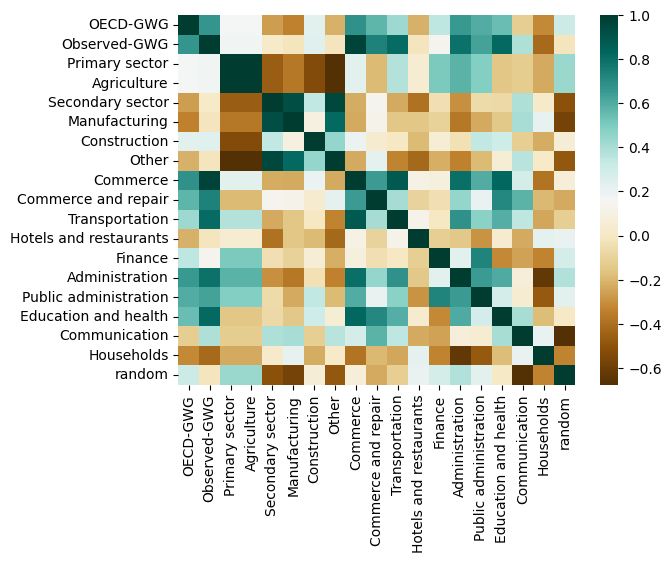

In [202]:
ece = pd.read_csv('ece.csv', sep=";", index_col='TIME')
sns.heatmap(ece.corr(), cmap='BrBG')
plt.show()

We can see the strong correlation between the Gender wage gap we observed and the OECD data. Any difference at all, appears between those because OECD data also considers self-employed men and women as a separate group and part-time employed people pro rata, for final calculation. Whereas our data only regards full-time employed population.

What interests us is the correlation between the changes of wage gap in different industries and both of the wage gaps.


<Axes: >

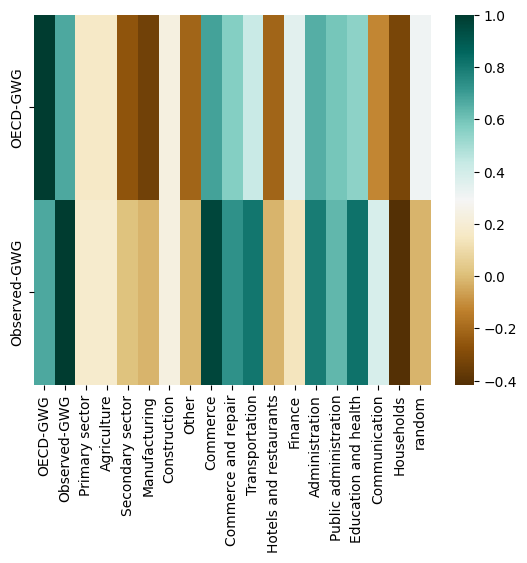

In [203]:
sns.heatmap(ece.corr().iloc[0:2,:],cmap='BrBG')

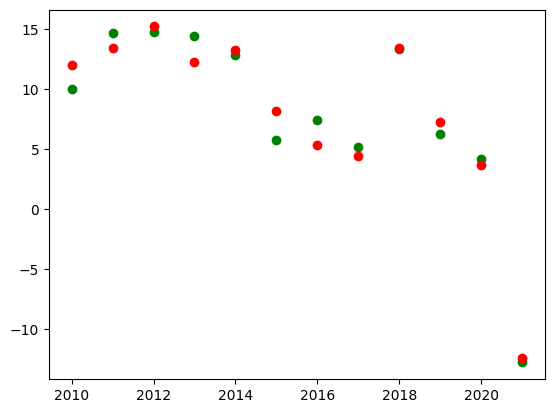

In [212]:
x = ece.iloc[:, 8:11].join(ece.iloc[:, 13:16])
y = ece.loc[:, 'Observed-GWG']
multiple_regr = linear_model.LinearRegression()
multiple_regr.fit(x, y)
y_pred=multiple_regr.predict(x)
plt.scatter(x=x.index,y=y,color='g')
plt.scatter(x=x.index, y=y_pred, color='r')
plt.show()